In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


class 1:fraud,class 0:not fraud 

In [5]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

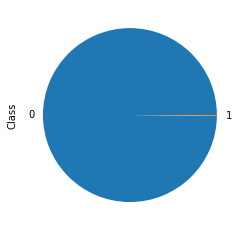

In [6]:
df['Class'].value_counts(normalize=True).plot.pie()

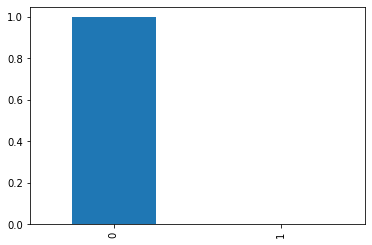

In [7]:
df['Class'].value_counts(normalize=True).plot.bar()

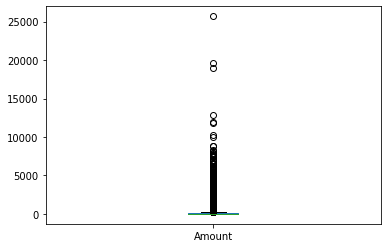

In [8]:
df['Amount'].plot.box()

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df2=df.loc[:,['Amount','Time']]
df2=ss.fit_transform(df2)
df2=pd.DataFrame(df2,columns=['Amount','Time'])

In [10]:
df['Amount']=df2['Amount']

In [11]:
df['Time']=df2['Time']

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
q1 = df['Amount'].quantile(0.25)
q2 = df['Amount'].quantile(0.5)
q3 = df['Amount'].quantile(0.75)

iqr = q3-q1

df = df[~(df['Amount']>(q3+1.5*iqr))]

In [15]:
df.shape

(252903, 31)

In [16]:
X=df.drop(['Class','V14','V4','V10','V12','V11','V16'],axis=1)
y=df['Class']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)

In [18]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(177032, 24) (75871, 24) (177032,) (75871,)


In [19]:
y_train.value_counts()

0    176751
1       281
Name: Class, dtype: int64

In [20]:
y_test.value_counts()

0    75751
1      120
Name: Class, dtype: int64

In [21]:
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix

In [22]:
def model_fit(algo,X_train,X_test,y_train,y_test):
    algo.fit(X_train,y_train)
    y_train_pred=algo.predict(X_train)
    y_train_prob=algo.predict_proba(X_train)[:,1]
    print('auc of train',roc_auc_score(y_train,y_train_prob))
    print('Confusion Matrix of train',confusion_matrix(y_train,y_train_pred))
    y_test_pred=algo.predict(X_test)
    y_test_prob=algo.predict_proba(X_test)[:,1]
    print('auc of test',roc_auc_score(y_test,y_test_prob))
    fpr,tpr,threshold=roc_curve(y_test,y_test_prob)
    print('Confusion Matrix of test',confusion_matrix(y_test,y_test_pred))
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr)
    plt.show()
    

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr=LogisticRegression()

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


auc of train 0.9384317737857131
Confusion Matrix of train [[176726     25]
 [   134    147]]
auc of test 0.9756403655837327
Confusion Matrix of test [[75737    14]
 [   51    69]]


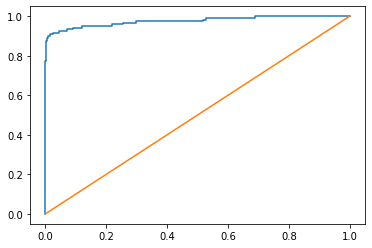

In [25]:
model_fit(lr,X_train,X_test,y_train,y_test)

# Strategies for handling imbalanced data

# undersampling the majority sample

In [26]:
Xy_train=pd.concat([X_train,y_train],axis=1)
Xy_train0=Xy_train.loc[Xy_train['Class']==0]
Xy_train1=Xy_train.loc[Xy_train['Class']==1]

len1=len(Xy_train1)
len0=len(Xy_train0)

Xy_train0_us=Xy_train0.sample(len1)
Xy_train_us=pd.concat([Xy_train0_us, Xy_train1],axis=0)

y_train_us=Xy_train_us['Class']
X_train_us=Xy_train_us.drop(['Class'],axis=1)

In [27]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


auc of train 0.9999989630948547
Confusion Matrix of train [[176751      0]
 [    22    259]]
auc of test 0.9580114453934601
Confusion Matrix of test [[75744     7]
 [   32    88]]


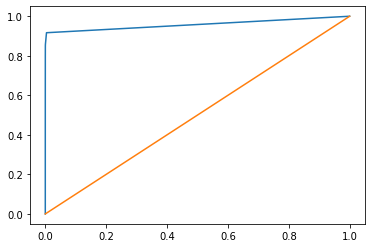

In [28]:
rf=RandomForestClassifier()
model_fit(rf,X_train,X_test,y_train,y_test)

# over-sample Minority Class

In [29]:
X_train0=Xy_train.loc[Xy_train['Class']==0]
X_train1=Xy_train.loc[Xy_train['Class']==1]

len1=len(Xy_train1)
len2=len(Xy_train0)

Xy_train1_os=Xy_train1.sample(len0,replace=True)

Xy_train_os=pd.concat([Xy_train1_os,Xy_train0],axis=0)
y_train_os=Xy_train_os['Class']
X_train_os=Xy_train_os.drop('Class',axis=1)



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


auc of train 0.9687671028766003
Confusion Matrix of train [[170223   6528]
 [ 21973 154778]]
auc of test 0.9915383955327323
Confusion Matrix of test [[72954  2797]
 [    8   112]]


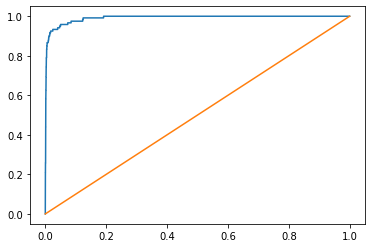

In [30]:
model_fit(lr,X_train_os, X_test,y_train_os, y_test)

auc of train 1.0
Confusion Matrix of train [[176751      0]
 [     0 176751]]
auc of test 0.9579894984884686
Confusion Matrix of test [[75743     8]
 [   30    90]]


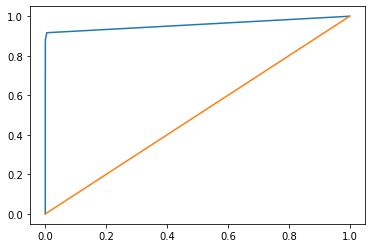

In [31]:
model_fit(rf,X_train_os, X_test,y_train_os, y_test)

# SMOTE

In [32]:
!pip install imblearn

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote=SMOTE(ratio='minority')
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)

In [35]:
X_train_sm.shape

(353502, 24)

In [36]:
y_train_sm.shape

(353502,)

In [37]:
X_train_sm=pd.DataFrame(X_train_sm,columns=X_train.columns)

In [38]:
y_train_sm=pd.Series(y_train_sm)

In [39]:
y_train_sm.value_counts()

1    176751
0    176751
dtype: int64

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


auc of train 0.9718866479468181
Confusion Matrix of train [[170171   6580]
 [ 19059 157692]]
auc of test 0.98472759435519
Confusion Matrix of test [[72936  2815]
 [    7   113]]


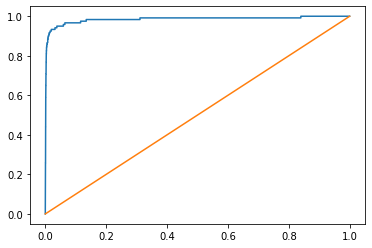

In [40]:
model_fit(lr,X_train_sm,X_test,y_train_sm,y_test)

auc of train 0.9999999990717302
Confusion Matrix of train [[176750      1]
 [     0 176751]]
auc of test 0.9652557391981623
Confusion Matrix of test [[75738    13]
 [   21    99]]


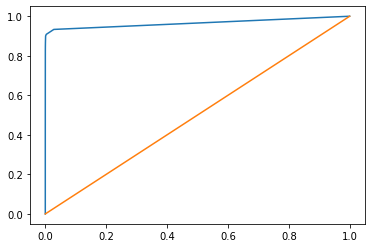

In [41]:
model_fit(rf,X_train_sm,X_test,y_train_sm,y_test)

# Applying PCA to reduce dimension and check impact on Models

In [42]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train)
variance=pd.DataFrame(pca.explained_variance_ratio_)

In [55]:
variance

,0
0,0.173073
1,0.121438
2,0.089076
3,0.080028
4,0.075173
5,0.063964
6,0.054950
7,0.047965
8,0.043701
9,0.034549


In [43]:
X_train.shape

(177032, 24)

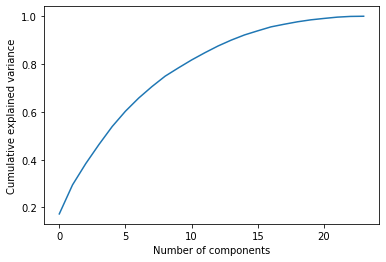

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [45]:
pca.explained_variance_        #eigen value

array([3.67517251, 2.57870037, 1.89151307, 1.69938212, 1.59629111,
       1.35826052, 1.16685508, 1.01852362, 0.92798935, 0.73363246,
       0.70555683, 0.64129633, 0.60138542, 0.52319336, 0.45830777,
       0.36519613, 0.35035185, 0.23358929, 0.21628365, 0.17283021,
       0.12550401, 0.11488819, 0.06409987, 0.01597162])

In [46]:
sum(pca.explained_variance_)

21.234774736207115

In [47]:
((pca.explained_variance_)/(sum(pca.explained_variance_)))*100 #pca.explained_variance_ratio

array([17.30732988, 12.14376137,  8.90762012,  8.0028262 ,  7.51734419,
        6.39639712,  5.49501983,  4.79648893,  4.37013982,  3.45486341,
        3.32264807,  3.02002887,  2.83207819,  2.46385171,  2.15828881,
        1.71980225,  1.64989669,  1.10003187,  1.01853519,  0.81390177,
        0.59103058,  0.54103793,  0.30186274,  0.07521446])

In [63]:
from sklearn.decomposition import PCA
pca=PCA(n_components=24)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [64]:
X_train.shape

(177032, 24)

In [65]:
XP=pd.DataFrame(X_train_pca,columns=X_train.columns)

In [66]:
XP

,Time,V1,V2,V3,V5,V6,V7,V8,V9,V13,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.730910,-1.375451,-0.879510,-0.546330,-1.358473,0.041745,-1.346907,2.113711,-0.931589,0.462645,...,-0.838431,0.020353,0.099917,1.022133,-0.334848,0.297922,-0.171010,0.052186,-0.105444,-0.015486
1,1.416794,0.198492,-0.534444,1.394016,0.962896,-0.993575,0.555927,-0.298503,-0.116460,-1.053858,...,-1.323200,0.359208,0.173443,-0.349304,-0.881387,-0.216616,0.052376,0.056026,-0.151294,0.141664
2,3.725494,0.705941,0.643947,2.997402,-1.643427,17.507404,2.449872,-0.648131,0.518294,-0.455307,...,-0.843261,-0.490904,-0.126753,-0.047379,-0.003237,-0.535623,-0.628630,-0.006141,0.366458,0.003479
3,-0.957438,-0.894400,0.647249,0.127244,-0.467387,0.018176,-0.324936,1.030230,0.085007,-0.213045,...,-0.428543,-0.103810,-0.024590,0.155730,0.269083,0.024189,-0.161122,0.108009,-0.004439,0.024942
4,1.014538,-0.700639,-0.495109,-0.837169,0.249238,0.098170,-2.225889,1.370825,-1.220235,0.262388,...,0.258561,-0.436444,-0.736438,-0.058406,-0.755155,-0.180743,-0.211015,0.260425,0.082596,-0.123644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177027,1.543022,-0.497680,0.807939,-0.755511,-0.632124,-0.360696,0.694340,0.185277,0.535195,0.429658,...,0.282507,-0.158829,-0.824968,-0.057336,-0.342535,-0.236842,0.244313,0.170643,-0.029425,-0.331700
177028,-0.926055,-0.877272,1.429316,-0.538364,-0.150701,0.138238,-0.046745,0.048704,1.347703,0.366096,...,0.543063,-0.667832,-0.253701,0.025607,0.428025,0.045389,-0.118013,0.046996,0.014427,0.000496
177029,-2.656850,0.332227,1.616120,0.932981,1.827407,0.406967,1.001392,-1.035822,-0.855013,-0.458260,...,-0.328758,-0.063333,-0.064622,-0.099368,-0.210936,-0.050383,-0.019919,-0.003674,-0.081426,0.228486
177030,-1.257369,-1.352844,1.294535,0.867997,0.381736,0.173444,0.791648,0.959995,-0.187211,0.412824,...,-0.469845,-0.003679,-0.205058,-0.466545,0.742765,-0.017228,0.027060,0.016807,-0.006531,0.112605


In [49]:
pca.components_

array([[-1.01288256e-01, -9.29094271e-01,  3.39154115e-01,
         5.98328538e-02,  7.55075433e-04, -2.38371084e-02,
        -6.07148612e-02,  3.62204502e-02, -3.24409413e-03,
        -2.19186729e-03,  8.88968471e-04,  8.84307672e-03,
         2.22000786e-03, -6.15774524e-03,  4.30023213e-02,
         1.42041660e-02, -7.68785179e-03, -7.89259558e-03,
        -2.11687827e-05, -5.57071390e-05,  1.02939993e-03,
        -4.50527287e-03,  1.61485905e-04, -4.59798328e-03],
       [ 3.67879347e-01,  1.17051568e-02,  2.87136051e-01,
        -8.74151968e-01,  1.04797969e-01, -4.13774071e-02,
        -1.29718242e-02,  2.00391849e-02,  2.60160806e-02,
        -1.33739346e-02, -4.50885426e-02,  6.17386445e-04,
         2.12311419e-02,  4.25070430e-03,  1.45953067e-02,
         9.56575410e-03,  1.26519518e-02,  2.26759068e-02,
        -1.85795025e-03, -1.35125977e-02, -3.83469949e-03,
        -2.11938830e-03, -1.08747695e-04, -1.15120207e-02],
       [-1.34232899e-01,  1.18497985e-01,  2.22731241e

In [50]:
pd.DataFrame(pca.components_.T,index=X_train.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Time,-0.101288,0.367879,-0.134233,-0.150077,0.146284,0.021046,0.002657,-0.245077,-0.428730,0.132009,-0.270451,0.062169,-0.411316,0.051103
V1,-0.929094,0.011705,0.118498,0.000853,-0.267096,-0.016499,0.039052,0.005960,0.023990,-0.009514,0.017861,0.004364,0.043081,-0.000650
V2,0.339154,0.287136,0.222731,-0.091273,-0.741666,0.012408,0.107551,-0.046146,-0.042087,0.018607,-0.010617,0.016317,0.007845,0.003768
V3,0.059833,-0.874152,-0.050735,-0.150094,-0.151829,-0.007142,0.002787,-0.123932,-0.206750,0.044308,-0.109782,0.029578,-0.133456,0.021375
V5,0.000755,0.104798,-0.793009,-0.287593,0.059353,-0.032660,-0.003361,0.137501,0.167351,-0.014184,0.070441,0.009117,0.129649,-0.006748
V6,-0.023837,-0.041377,-0.502756,0.688322,-0.400630,0.025321,0.002091,-0.087556,-0.101697,0.002218,-0.027315,-0.005460,-0.079383,0.006723
V7,-0.060715,-0.012972,-0.164193,-0.588707,-0.349478,-0.279633,0.018261,-0.030142,0.001108,-0.015859,0.002491,-0.026857,-0.041405,-0.034003
V8,0.036220,0.020039,0.061389,0.197693,0.084504,-0.955491,-0.027785,0.001223,-0.026041,0.011480,-0.016031,0.007238,-0.010731,-0.032862
V9,-0.003244,0.026016,0.025547,-0.023764,-0.099747,0.020476,-0.990563,-0.006637,0.023415,0.014441,-0.004645,-0.022246,-0.023363,-0.014033
V13,-0.002192,-0.013374,0.023171,0.014761,-0.055130,0.006797,-0.007054,0.918281,-0.366888,0.041028,-0.071821,0.013200,-0.065324,0.000171


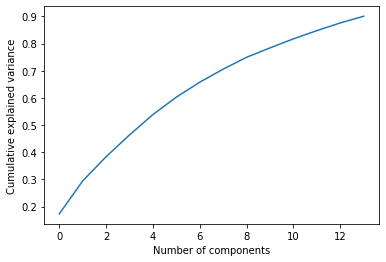

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


auc of train 0.9138759472053001
Confusion Matrix of train [[176728     23]
 [   137    144]]
auc of test 0.9582159531447331
Confusion Matrix of test [[75738    13]
 [   60    60]]


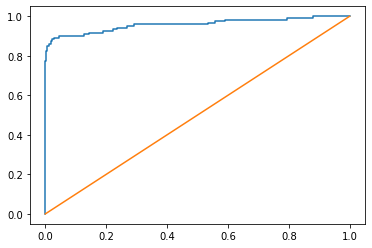

In [52]:
model_fit(lr,X_train_pca,X_test_pca,y_train,y_test)


auc of train 0.9999977248489043
Confusion Matrix of train [[176749      2]
 [    15    266]]
auc of test 0.9497178805120283
Confusion Matrix of test [[75742     9]
 [   29    91]]


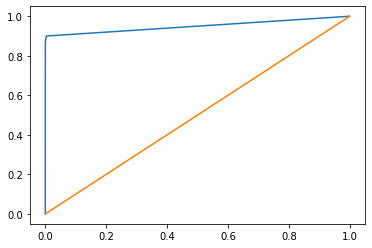

In [53]:
model_fit(rf,X_train_pca,X_test_pca,y_train,y_test)